In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import xtrack as xt
import xdeps as xd
import matplotlib.pyplot as plt

In [ ]:
line = xt.Line.from_json("./lattice_files/fccee_t_V22_thick_with_wigglers.json")

Loading line from dict: 100%|██████████| 17950/17950 [00:01<00:00, 12764.24it/s]


Done loading line from dict.           


In [4]:
print(line.vars.keys()) #print all of the available variables/knobs
print(line.vars["version"]._value)

['t_turn_s', '__vary_default', 'version', 'pi', 'twopi', 'degrad', 'raddeg', 'e', 'amu0', 'emass', 'mumass', 'nmass', 'umass', 'pmass', 'clight', 'qelect', 'hbar', 'erad', 'prad', 'twiss_tol', 'axisad', 'bxisad', 'ayisad', 'byisad', 'exisad', 'epxisad', 'eyisad', 'epyisad', 'k1qc1l1', 'lqc1l1', 'k1qc1r2', 'lqc1r2', 'k1qc1r3', 'lqc1r3', 'k1qc2r1', 'lqc2r1', 'k1qc2r2', 'lqc2r2', 'k1qt1', 'lqt1', 'k1qc3', 'lqc3', 'k1qc4', 'lqc4', 'anglebc1', 'lbc1', 'k1qc5', 'lqc5', 'anglebc2', 'lbc2', 'k1qc6', 'lqc6', 'anglebc3', 'lbc3', 'k1qc7', 'lqc7', 'k2sy1r', 'lsy1r', 'anglebc4', 'lbc4', 'k1qy2', 'lqy2', 'anglebc5', 'lbc5', 'k1qy1', 'lqy1', 'anglebc6', 'lbc6', 'anglebc7', 'lbc7', 'k2sy2r', 'lsy2r', 'k1qa1', 'lqa1', 'k1qa2', 'lqa2', 'k1qa3', 'lqa3', 'k1qa4', 'lqa4', 'k1qa5', 'lqa5', 'k1qa6', 'lqa6', 'anglebs1', 'lbs1', 'k1qs1', 'lqs1', 'anglebs2', 'lbs2', 'k1qs2', 'lqs2', 'anglebs3', 'lbs3', 'k1qs3', 'lqs3', 'k2sf1', 'lsf1', 'k1qfg2', 'lqfg2', 'anglebg1', 'lbg1', 'k1qdg1', 'lqdg1', 'k2sd1', 'lsd1', '

In [5]:
fccee_p_ring_beam_gamma = 357143.59100095095 #comes from mad.sequence.fccee_p_ring.beam.gamma
line.particle_ref = xt.Particles(matt0=xt.ELECTRON_MASS_EV, gamma0=fccee_p_ring_beam_gamma)
twiss = line.twiss(method="4d")

In [4]:
# line.element_names

In [6]:
sv = line.survey()

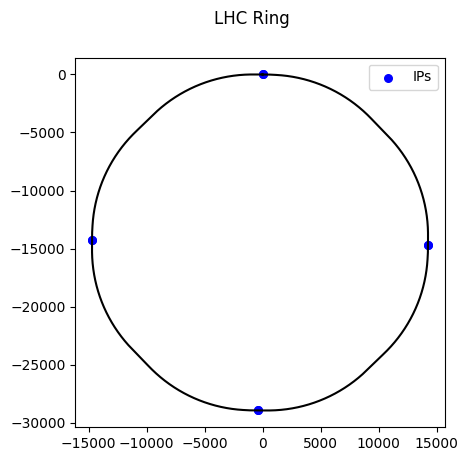

In [10]:

fig, ax = plt.subplots()
fig.suptitle('LHC Ring')
ax.set_box_aspect(1)

ax.plot(sv.Z,sv.X, c="black")

for i in range(8):
    name = "ip.{}".format(i+1)
    Z = sv["Z",name]
    X = sv["X",name]
    ax.scatter(Z,X,color="blue",s=30,label="IPs"*(i==0))
plt.legend()


In [34]:


# all elements and their names
el1 = zip(line.element_names,line.elements)

#find all elements that are an instance of xt.Quadrupole
quadrupoles = filter(lambda el:isinstance(el[1],xt.Quadrupole),el1)
quadrupoles = list(quadrupoles)

quadrupole_names = list(map(lambda el: el[0], quadrupoles))
print("Quadrupole_names:",quadrupole_names)
print("Nr of quadrupoles:", len(quadrupole_names))
print("_"*100)

#finding the knobs:
for quad in quadrupoles:
    name = quad[0]
    # print("Name of quad:",name)
    # print("element.to_dict():",line[name].to_dict())
    knob = line.element_refs[name].k1._expr  
    print(f"Quadrupole {name} is controlled by a knob:",knob._rhs._key)

# In this case, the knobs controlling the quadrupoles in the arcs are controlled by variables "k1qf4", "k1qf2", "k1qd3" and "k1qd1"


Quadrupole_names: ['qc1l1.1', 'qc1r2.1', 'qc1r3.1', 'qc2r1.1', 'qc2r2.1', 'qt1.1', 'qc3.1', 'qc4.1', 'qc5.1', 'qc6.1', 'qc7.1', 'qy2.1', 'qy1.1', 'qy2.2', 'qa1.1', 'qa2.1', 'qa3.1', 'qa4.1', 'qa5.1', 'qa6.1', 'qs1.1', 'qs2.1', 'qs3.1', 'qfg2.1', 'qdg1.1', 'qfg2.2', 'qdg1.2', 'qfg2.3', 'qdg1.3', 'qfg2.4', 'qdg1.4', 'qfg2.5', 'qdg1.5', 'qfg2.6', 'qdg1.6', 'qfg2.7', 'qdg1.7', 'qfg2.8', 'qdg1.8', 'qfg2.9', 'qdg1.9', 'qfg2.10', 'qg1.1', 'qg2.1', 'qg3.1', 'qg4.1', 'qg5.1', 'qg6.1', 'qg7.1', 'qg8.1', 'qg9.1', 'qd3.1', 'qf4.1', 'qd3.2', 'qf4.2', 'qd3.3', 'qf4.3', 'qd3.4', 'qf4.4', 'qd3.5', 'qf4.5', 'qd3.6', 'qf4.6', 'qd3.7', 'qf4.7', 'qd3.8', 'qf4.8', 'qd3.9', 'qf4.9', 'qd3.10', 'qf4.10', 'qd3.11', 'qf4.11', 'qd3.12', 'qf4.12', 'qd3.13', 'qf4.13', 'qd3.14', 'qf4.14', 'qd3.15', 'qf4.15', 'qd3.16', 'qf4.16', 'qd3.17', 'qf4.17', 'qd3.18', 'qf4.18', 'qd3.19', 'qf4.19', 'qd3.20', 'qf4.20', 'qd3.21', 'qf4.21', 'qd3.22', 'qf4.22', 'qd3.23', 'qf4.23', 'qd3.24', 'qf4.24', 'qd3.25', 'qf4.25', 'qd3.26', 


Quadrupoles controlled by k1qf4 are colored #1f77b4
Nr. of quads: 696

Quadrupoles controlled by k1qf2 are colored #ff7f0e
Nr. of quads: 720

Quadrupoles controlled by k1qd3 are colored #2ca02c
Nr. of quads: 700

Quadrupoles controlled by k1qd1 are colored #d62728
Nr. of quads: 720


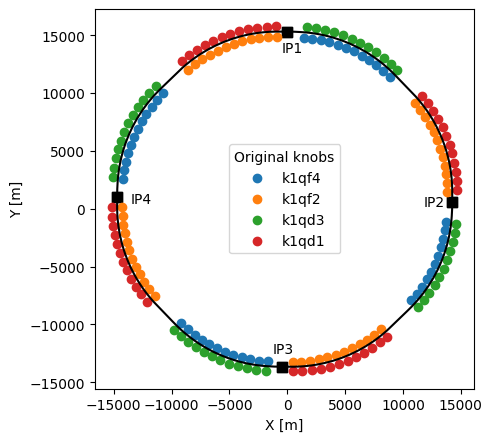

In [ ]:
# The example FCC ring uses a few thousand quadrupole magnets. 
# A part of them is layed-out in focusing-defocusing pairs (FODO cells); those are controlled by vairables 'k1qf4', 'k1qf2', 'k1qd3', 'k1qd1'


fig3, ax3 = plt.subplots(figsize=(5,5))
ax3.set_box_aspect(1)
offset = 15300 # center the ring

ax3.plot(sv.Z,sv.X + offset, c="black")


for i in range(8):
    name = "ip.{}".format(i+1)
    Z = sv["Z",name]
    X = sv["X",name]+offset
    ax3.scatter(Z,X,color="black",s=50, marker="s")

text_x = [-1300,-500,11800,-13500]
text_y = [-12500,13500,200,500]
t = ["IP3", "IP1", "IP2", "IP4"]

for x,y,tx in zip(text_x, text_y,t):
    ax3.text(x,y,tx)


qd_vars = ['k1qf4', 'k1qf2', 'k1qd3', 'k1qd1']
cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#6b6ecf', '#7b4173']


count = 0
# for i,var_name in enumerate(["k1qd3"]):
for i,var_name in enumerate(qd_vars):
    dep_targets = line.vars[var_name]._find_dependant_targets()
    print()
    print(f"Quadrupoles controlled by {var_name} are colored {cs[i]}")

    # find_dependant_targets() returns (in this spcific case; might be diffenrent otherwise) the variable itself as the first argument and then all of the targets, but in pairs or element (xdeps.refs.ItemRef, eg. ), element.parameter_name (xdeps.refs.AttrRef).
    # The following filter function returns only the xdeps.refs.ItemRef elements
    def filter_func(dt):
        if dt._key in qd_vars: return False
        if type(dt)==xd.refs.ItemRef: return True
        else:return False
    dep_targets = list(filter(filter_func,dep_targets))

    print("Nr. of quads:", len(dep_targets))
    # print(dep_targets)

    Xs = []
    Zs = []

    for j,target in enumerate(dep_targets):
        if j%15!=0: continue
        l = len(dep_targets)
                
        # print(type(target)) #gives either xdeps.refs.ItemRef (referencing an element) or AttrRef (referencing an actual parameter of an element)
        if type(target) == xd.refs.ItemRef:
            quad_name = target._key
            Z = sv["Z",quad_name]
            X = sv["X",quad_name] + offset
            # ax3.scatter(Z,X,c=cs[i],s=np.random.randint(3,20),alpha=1)
            count += 1


            d = 1 if "d" in var_name else -1
            # d=1
            x_a = X*0.03*d
            z_a = Z*0.03*d
            X = X + x_a
            Z = Z + z_a
            Xs.append(X)
            Zs.append(Z)

    ax3.scatter(Zs,Xs,c=cs[i],alpha=1,label=var_name)

plt.legend(title="Original knobs")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.tight_layout()

# plt.savefig("og_vars.png")

In [36]:
plot = False

if plot:
    fig2, ax2 = plt.subplots()
    fig2.suptitle('LHC Ring')
    ax2.set_box_aspect(1)

    ax2.plot(sv.Z,sv.X, c="black")

colors = {
    1:"orange",
    2:"blue",
    3:"red",
    4:"green"
}


# dict keys are consecutive numbers of quadrants, a layer lower dict keys are names of yet-to-be-defined new variables, that will control the quadrupol groups. q_name is the template name of the actual element (the quadrupole), e.g. qf1.{i}, where i should range from q_min to q_max (inclusively)

# We have determined above, that the relevant quadrupoles follow a naming scheme q{f/d}{1/2/3/4}.{nr}, where {f/d} indicates focusing/defocusing, the {1/2/3/4} indicates which variable it is initially controled by (which group). {nr} indicated individual quadrupoles

# For now, q_min and q_max have to be determined manually. Process could be automated by determining the quadrant that the quadrupole sits in by looking at its physical location (one way would be to calculate its polar angle)


kvadrants = {
    "4":{
        "f4.4":{
            "q_min":523,
            "q_max":696,
            "color":4,
            "q_name":"qf4.{}"
        },
        "f2.4":{
            "q_min":541,
            "q_max":720,
            "color":2,
            "q_name":"qf2.{}"
        },
        "d1.4":{
            "q_min":541,
            "q_max":720,
            "color":1,
            "q_name":"qd1.{}"
        },
        "d3.4":{
            "q_min":526,
            "q_max":700,
            "color":3,
            "q_name":"qd3.{}"
        }
    },
    "3":{
        "f4.3":{
            "q_min":349,
            "q_max":522,
            "color":4,
            "q_name":"qf4.{}"
        },
        "f2.3":{
            "q_min":361,
            "q_max":540,
            "color":2,
            "q_name":"qf2.{}"
        },
        "d1.3":{
            "q_min":361,
            "q_max":540,
            "color":1,
            "q_name":"qd1.{}"
        },
        "d3.3":{
            "q_min":351,
            "q_max":525,
            "color":3,
            "q_name":"qd3.{}"
        }
    },
    "2":{
        "f4.2":{
            "q_min":175,
            "q_max":348,
            "color":4, 
            "q_name":"qf4.{}"
        },
        "f2.2":{
            "q_min":181,
            "q_max":360,
            "color":2,
            "q_name":"qf2.{}"
        },
        "d1.2":{
            "q_min":181,
            "q_max":360,
            "color":1,
            "q_name":"qd1.{}"
        },
        "d3.2":{
            "q_min":176,
            "q_max":350,
            "color":3,
            "q_name":"qd3.{}"
        }
    },
    "1":{
        "f4.1":{
            "q_min":1,
            "q_max":174,
            "color":4,
            "q_name":"qf4.{}"
        },
        "f2.1":{
            "q_min":1,
            "q_max":180,
            "color":2,
            "q_name":"qf2.{}"
        },
        "d1.1":{
            "q_min":1,
            "q_max":180,
            "color":1,
            "q_name":"qd1.{}"
        },
        "d3.1":{
            "q_min":1,
            "q_max":175,
            "color":3,
            "q_name":"qd3.{}"
        }
    }
}


count = 0
# cycle through kvadrants (=quadrants; just notation)
for kvadrant_number in range(1,4+1):
    quad_groups = kvadrants[str(kvadrant_number)]
    # cycle through control groups, create new variables
    for var_name in quad_groups:

        # just assigning default values for start
        if "f4." in var_name: 
            # _v = 0.01945854423980324 
            _v = line.vars["k1qf4"]._value
        elif "d3." in var_name:
            # _v = -0.019454492494967005
            _v = line.vars["k1qd3"]._value
        elif "f2." in var_name:
            # _v = 0.01945923833768676
            _v = line.vars["k1qf2"]._value
        elif "d1." in var_name:
            # _v = -0.019455049064752854
            _v = line.vars["k1qd1"]._value
        else:
            print("wtf")

        line.vv[var_name] = _v #create a new knob, assign it a value

        d = quad_groups[var_name]
        q_min = d["q_min"]
        q_max = d["q_max"]
        q_name_tmp = d["q_name"]
        color_id = d["color"]

        print(f"Assigning new knobs to quadrupoles in kvadrant {kvadrant_number} in the group {var_name}")

        for i in range(q_min, q_max+1):
            q_name = q_name_tmp.format(i) # name of the quadrupole element

            line.element_refs[q_name].k1 = line.vars[var_name] #assign a new var to the quadrupole's integrated strength paramter "k1"

            # plot the quadrupole position
            if plot:
                Z = sv["Z",q_name]
                X = sv["X",q_name]    
                ax2.scatter(Z,X,c=colors[color_id],s=8,alpha=0.5)
            count +=1

print("Total number of quadrupoles: ",count)



Assigning new knobs to quadrupoles in kvadrant 1 in the group f4.1
Assigning new knobs to quadrupoles in kvadrant 1 in the group f2.1
Assigning new knobs to quadrupoles in kvadrant 1 in the group d1.1
Assigning new knobs to quadrupoles in kvadrant 1 in the group d3.1
Assigning new knobs to quadrupoles in kvadrant 2 in the group f4.2
Assigning new knobs to quadrupoles in kvadrant 2 in the group f2.2
Assigning new knobs to quadrupoles in kvadrant 2 in the group d1.2
Assigning new knobs to quadrupoles in kvadrant 2 in the group d3.2
Assigning new knobs to quadrupoles in kvadrant 3 in the group f4.3
Assigning new knobs to quadrupoles in kvadrant 3 in the group f2.3
Assigning new knobs to quadrupoles in kvadrant 3 in the group d1.3
Assigning new knobs to quadrupoles in kvadrant 3 in the group d3.3
Assigning new knobs to quadrupoles in kvadrant 4 in the group f4.4
Assigning new knobs to quadrupoles in kvadrant 4 in the group f2.4
Assigning new knobs to quadrupoles in kvadrant 4 in the group 

In [17]:
# Save to json
line.to_json(".lattice_files/fccee_t_thin_new_vars.json")

f4.1
f2.1
d1.1
d3.1
f4.2
f2.2
d1.2
d3.2
f4.3
f2.3
d1.3
d3.3
f4.4
f2.4
d1.4
d3.4
208


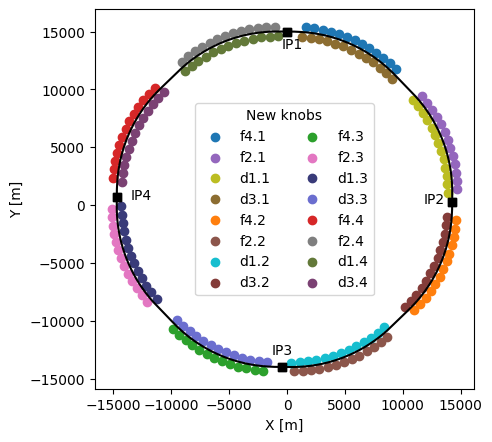

In [ ]:
# Just plotting

offset = -15000
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#6b6ecf', '#7b4173']

fig4, ax4 = plt.subplots(figsize=(5,5))
ax4.set_box_aspect(1)

# fig4.suptitle("New knobs for the arc quadrupoles")
ax4.plot(sv.Z,sv.X-offset, c="black")

count = 0
for i,kvadrant_number in enumerate(range(1,4+1)):
    quad_groups = kvadrants[str(kvadrant_number)]
    for j,var_name in enumerate(quad_groups.keys()):
        print(var_name)
        dep_targets = line.vars[var_name]._find_dependant_targets()
        def filter_func(dt):
            if dt._key == var_name: return False
            if type(dt)==xd.refs.ItemRef: return True
            else:return False
        dep_targets = list(filter(filter_func,dep_targets))
        # print(dep_targets)
        Xs = []
        Zs = []
        for k,target in enumerate(dep_targets):
            if k%14!=0: continue
            quad_name = target._key
            Z = sv["Z",quad_name]
            X = sv["X",quad_name]-offset
            Xs.append(X)
            Zs.append(Z)
            count += 1


        d = 1 if var_name[0] == "f" else -1
        x_a = np.mean(Xs)*0.03*d
        z_a = np.mean(Zs)*0.03*d

        ax4.scatter(Zs+z_a,Xs+x_a,c=colors[int(i+4*j)],alpha=1,label=var_name)

for i in range(8):
    name = "ip.{}".format(i+1)
    Z = sv["Z",name]
    X = sv["X",name]-offset
    ax4.scatter(Z,X,color="black",s=30, marker="s")

text_x = [-1300,-500,11800,-13500]
text_y = [-12900,13500,200,500]
t = ["IP3", "IP1", "IP2", "IP4"]

for x,y,tx in zip(text_x, text_y,t):
    ax4.text(x,y,tx)


plt.xlabel("X [m]")
plt.ylabel("Y [m]")

plt.legend(title="New knobs", ncol=2)
plt.tight_layout()
# plt.savefig("new_vars.png")

In [24]:
# Slicing the line

Strategy = xt.slicing.Strategy
Teapot = xt.slicing.Teapot
slicing_strategies = [
    Strategy(slicing=Teapot(1)),  # Default catch-all as in MAD-X
    Strategy(slicing=Teapot(3), element_type=xt.Bend),
    Strategy(slicing=Teapot(3), element_type=xt.CombinedFunctionMagnet),
    Strategy(slicing=Teapot(5), name=r'^qf.*'),
    Strategy(slicing=Teapot(5), name=r'^qd.*'),
    Strategy(slicing=Teapot(5), name=r'^qfg.*'),
    Strategy(slicing=Teapot(5), name=r'^qdg.*'),
    Strategy(slicing=Teapot(5), name=r'^ql.*'),
    Strategy(slicing=Teapot(5), name=r'^qs.*'),
    Strategy(slicing=Teapot(10), name=r'^qb.*'),
    Strategy(slicing=Teapot(10), name=r'^qg.*'),
    Strategy(slicing=Teapot(10), name=r'^qh.*'),
    Strategy(slicing=Teapot(10), name=r'^qi.*'),
    Strategy(slicing=Teapot(10), name=r'^qr.*'),
    Strategy(slicing=Teapot(10), name=r'^qu.*'),
    Strategy(slicing=Teapot(10), name=r'^qy.*'),
    Strategy(slicing=Teapot(50), name=r'^qa.*'),
    Strategy(slicing=Teapot(50), name=r'^qc.*'),
    Strategy(slicing=Teapot(20), name=r'^sy\..*'),
    Strategy(slicing=Teapot(30), name=r'^mwi\..*'),
]

line.slice_thick_elements(slicing_strategies=slicing_strategies)

The line already has an associated tracker


Slicing line: 100%|██████████| 17950/17950 [00:03<00:00, 4686.88it/s]


In [ ]:
line.to_json(".lattice_files/fccee_t_V22_thin_with_wigglers_new_vars.json")